In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\Dataset\Untitled Folder\train.csv")

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df = df.drop("Row ID", axis=1)

In [6]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
df.describe()

,Postal Code,Sales
count,9789.000000,9800.000000
mean,55273.322403,230.769059
std,32041.223413,626.651875
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,58103.000000,54.490000
75%,90008.000000,210.605000
max,99301.000000,22638.480000


In [8]:
df.shape

(9800, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [10]:
df.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9789 non-null   object 
 1   Order Date     9789 non-null   object 
 2   Ship Date      9789 non-null   object 
 3   Ship Mode      9789 non-null   object 
 4   Customer ID    9789 non-null   object 
 5   Customer Name  9789 non-null   object 
 6   Segment        9789 non-null   object 
 7   Country        9789 non-null   object 
 8   City           9789 non-null   object 
 9   State          9789 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9789 non-null   object 
 12  Product ID     9789 non-null   object 
 13  Category       9789 non-null   object 
 14  Sub-Category   9789 non-null   object 
 15  Product Name   9789 non-null   object 
 16  Sales          9789 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [14]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [15]:
df['Postal Code'] =df['Postal Code'].astype(int)

In [16]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [17]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [18]:
df.groupby(['Ship Mode'], as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)

,Ship Mode,Sales
3,Standard Class,1.332617e+06
2,Second Class,4.491990e+05
0,First Class,3.455723e+05
1,Same Day,1.252190e+05


<AxesSubplot:xlabel='Ship Mode', ylabel='Sales'>

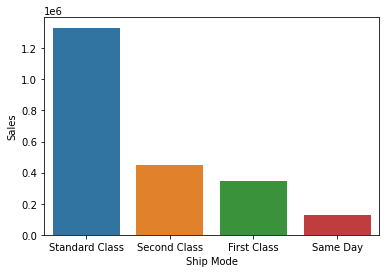

In [19]:
shipModeSales = df.groupby(['Ship Mode'], as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)

sns.barplot(x="Ship Mode", y="Sales", data=shipModeSales)

Most of the Shipping are done in the Standared class. This might be because in Standared class the Shipping price may be affordable also after standared calss there is second Class got Second Rank, and as we know that second class also has afforadable prices

In [20]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [21]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [22]:
df['Segment'].value_counts()

Consumer       5096
Corporate      2948
Home Office    1745
Name: Segment, dtype: int64

In [23]:
df.groupby(['Segment'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending = False)

,Segment,Sales
0,Consumer,1.146708e+06
1,Corporate,6.822118e+05
2,Home Office,4.236874e+05


<AxesSubplot:xlabel='Segment', ylabel='Sales'>

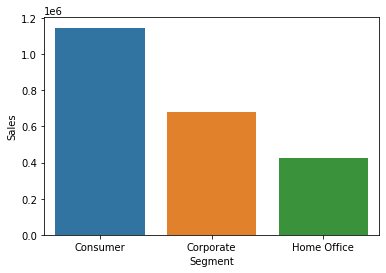

In [24]:
SegmentSales = df.groupby(['Segment'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending = False)

sns.barplot(data = SegmentSales, x="Segment",y='Sales')

## From which city the Sales are maximum

In [25]:
df['City'].value_counts().head(10)

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Houston          374
Chicago          308
Columbus         221
San Diego        170
Springfield      161
Name: City, dtype: int64

Consumer segment are having more sales than Corporate Segment and Home Office

In [26]:
df.groupby(['City'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(10)

,City,Sales
327,New York City,252462.5470
265,Los Angeles,173420.1810
450,Seattle,116106.3220
436,San Francisco,109041.1200
372,Philadelphia,108841.7490
207,Houston,63956.1428
80,Chicago,47820.1330
435,San Diego,47521.0290
216,Jacksonville,44713.1830
123,Detroit,42446.9440


<AxesSubplot:xlabel='City', ylabel='Sales'>

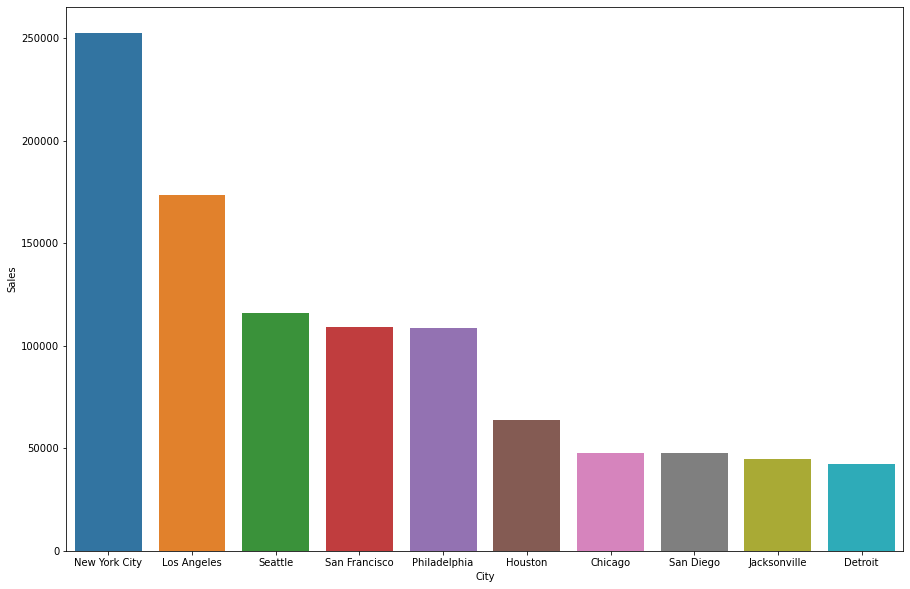

In [27]:
CitySales = df.groupby(['City'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(10)
plt.figure(figsize=(15,10))
sns.barplot(data=CitySales,x='City', y='Sales')

These are the top 10 citie where the value of sales is high

## Are there any Repeated customers

<AxesSubplot:>

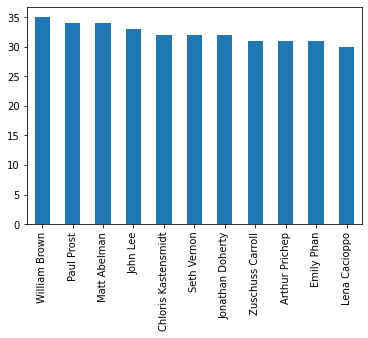

In [28]:
df['Customer Name'].value_counts().head(11).plot(kind='bar')

Yes there are repeating customers

## Ranking of customers accordng to higest sales

In [29]:
df.groupby(['Customer Name'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending =False).head(10)

,Customer Name,Sales
686,Sean Miller,25043.050
730,Tamara Chand,19052.218
622,Raymond Buch,15117.339
757,Tom Ashbrook,14595.620
6,Adrian Barton,14473.571
441,Ken Lonsdale,14175.229
671,Sanjit Chand,14142.334
334,Hunter Lopez,12873.298
672,Sanjit Engle,12209.438
156,Christopher Conant,12129.072


These are the top ten customers who have done more sales

In [30]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [31]:
df.groupby(['City','Postal Code'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending =False).head(10)

,City,Postal Code,Sales
394,New York City,10024,78534.044
395,New York City,10035,75151.829
392,New York City,10009,53225.076
525,San Francisco,94122,49114.375
393,New York City,10011,45551.598
540,Seattle,98105,41838.008
541,Seattle,98115,41160.908
446,Philadelphia,19134,39390.293
260,Jacksonville,32216,39133.328
323,Los Angeles,90049,37889.924


<AxesSubplot:xlabel='City', ylabel='Sales'>

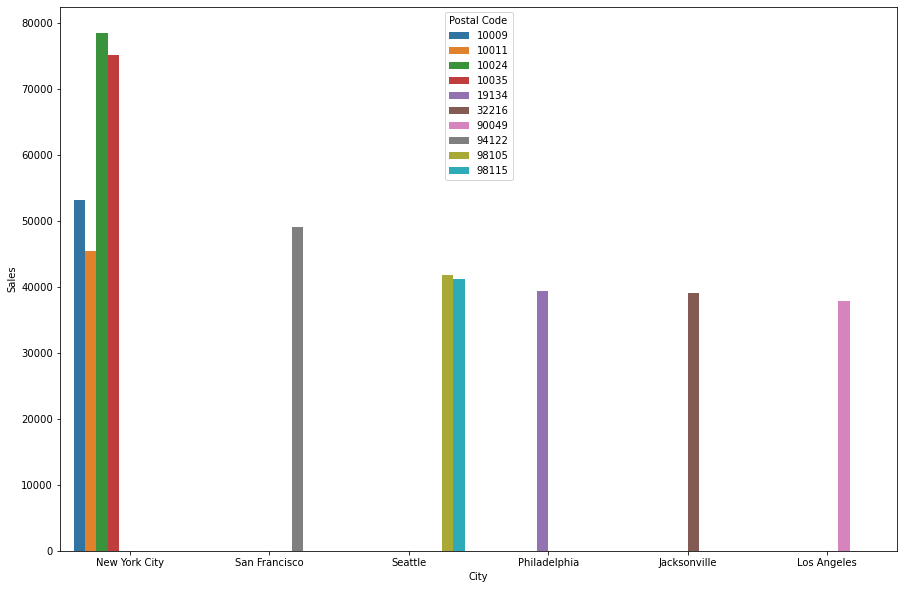

In [32]:
PostalCodeSales = df.groupby(['City','Postal Code'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending =False).head(10)
plt.figure(figsize=(15,10))
sns.barplot(data=PostalCodeSales, x='City', y='Sales', hue='Postal Code')

In [33]:
# State wise Number of Customers

df.groupby(['State'], as_index=False)['Customer Name'].count().sort_values(by='Customer Name', ascending =False).head(10)

,State,Customer Name
3,California,1946
30,New York,1097
41,Texas,973
36,Pennsylvania,582
44,Washington,504
11,Illinois,483
33,Ohio,454
8,Florida,373
20,Michigan,253
31,North Carolina,247


Most of the customers are from the above mentioned states

## State wise Sales

In [34]:
df.groupby(['State'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending =False).head(10)

,State,Sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
44,Washington,135206.8500
36,Pennsylvania,116276.6500
8,Florida,88436.5320
11,Illinois,79236.5170
20,Michigan,76136.0740
33,Ohio,75130.3500
43,Virginia,70636.7200


Most of the Sales are done from the above mentioed states

In [35]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [36]:
df.groupby(['Region'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending = False)


,Region,Sales
3,West,710219.6845
1,East,660589.3560
0,Central,492646.9132
2,South,389151.4590


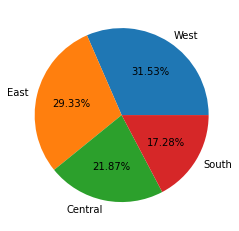

In [37]:
Region_Sales = df.groupby(['Region'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending = False)
plt.pie(Region_Sales['Sales'], labels=Region_Sales['Region'], autopct = '%1.2f%%' )
plt.show()

Most of the sales are from West and east region

In [38]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [39]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [40]:
df['Category'].value_counts()

Office Supplies    5903
Furniture          2076
Technology         1810
Name: Category, dtype: int64

In [41]:
df.groupby(['Category'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)


,Category,Sales
2,Technology,825856.1130
0,Furniture,723538.4757
1,Office Supplies,703212.8240


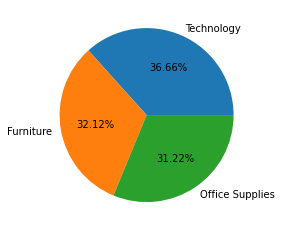

In [42]:

Category_Sales = df.groupby(['Category'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
plt.pie(Category_Sales['Sales'],labels = Category_Sales['Category'], autopct='%1.2f%%')
plt.show()

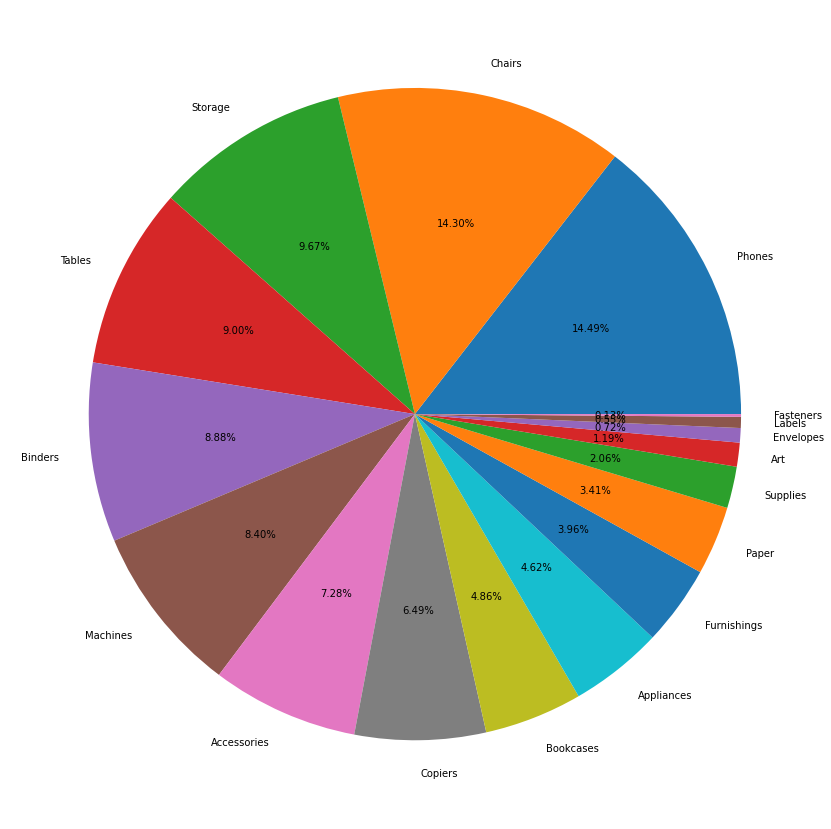

In [43]:
Sub_Category_Sales = df.groupby(['Sub-Category'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
plt.figure(figsize=(20,15))
plt.pie(Sub_Category_Sales['Sales'],labels = Sub_Category_Sales['Sub-Category'], autopct='%1.2f%%')
plt.show()